In [212]:
import torch
import kornia
import matplotlib.pyplot as plt
import torch.nn as nn
from dm_control import suite
from wrappers.gym_wrapper import GymWrapper
from wrappers.pixel_observation_wrapper import PixelObservation

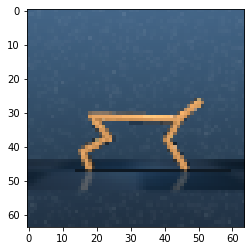

In [213]:
env1 = suite.load('cheetah', 'run', task_kwargs={'random': 0})
env1 = GymWrapper(env)
env1 = PixelObservation(env, 64)
obs1 = env.reset()
obs1 = torch.as_tensor(obs1)
plt.imshow(obs.transpose(0, 1).transpose(1, 2) + 0.5)

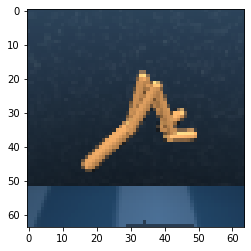

In [214]:
env2 = suite.load('walker', 'walk', task_kwargs={'random': 0})
env2 = GymWrapper(env)
env2 = PixelObservation(env, 64)
obs2 = env.reset()
obs2 = torch.as_tensor(obs2)
plt.imshow(obs2.transpose(0, 1).transpose(1, 2) + 0.5)

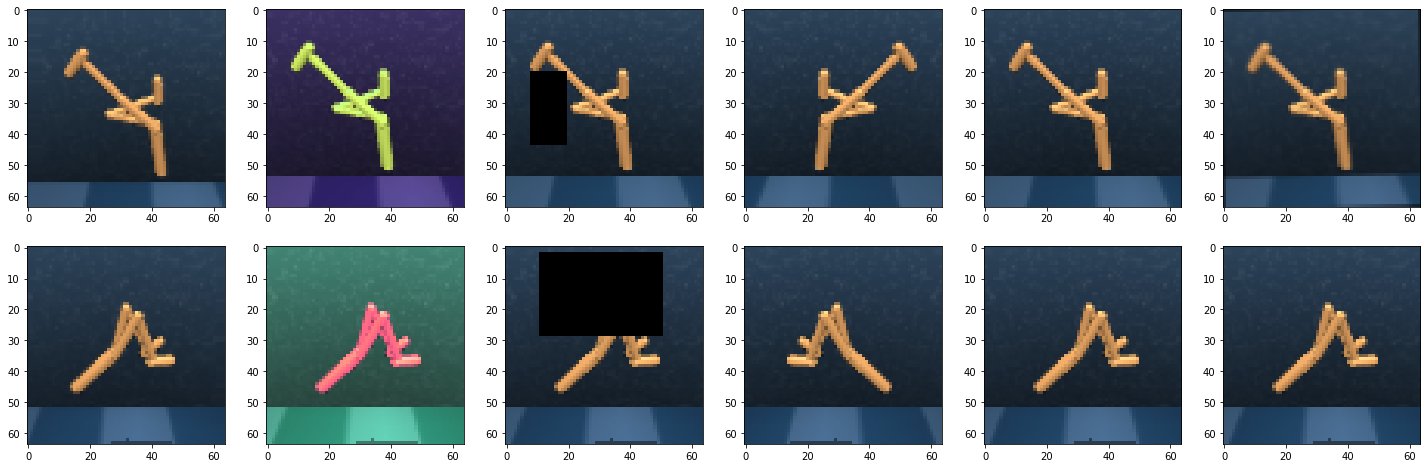

In [219]:
transform1 = nn.Sequential(
    nn.ReplicationPad2d(4),
    kornia.augmentation.RandomCrop(size=(64, 64)),
)
transform2 = kornia.augmentation.ColorJitter(0.2, 0.3, 0.2, 0.3)
transform3 = kornia.augmentation.RandomErasing()
transform4 = kornia.augmentation.RandomHorizontalFlip()
transform5 = kornia.augmentation.RandomVerticalFlip()
transform6 = kornia.augmentation.RandomRotation(degrees=5.0)

aug_obs_1 = transform1(obs1.unsqueeze(0) + 0.5)
aug_obs_2 = transform2(obs1.unsqueeze(0) + 0.5)
aug_obs_3 = transform3(obs1.unsqueeze(0) + 0.5)
aug_obs_4 = transform4(obs1.unsqueeze(0) + 0.5)
aug_obs_5 = transform5(obs1.unsqueeze(0) + 0.5)
aug_obs_6 = transform6(obs1.unsqueeze(0) + 0.5)
aug_obs_7 = transform1(obs2.unsqueeze(0) + 0.5)
aug_obs_8 = transform2(obs2.unsqueeze(0) + 0.5)
aug_obs_9 = transform3(obs2.unsqueeze(0) + 0.5)
aug_obs_10 = transform4(obs2.unsqueeze(0) + 0.5)
aug_obs_11 = transform5(obs2.unsqueeze(0) + 0.5)
aug_obs_12 = transform6(obs2.unsqueeze(0) + 0.5)

aug_obs_list_1 = [aug_obs_1, aug_obs_2, aug_obs_3, aug_obs_4, aug_obs_5, aug_obs_6,
                  aug_obs_7, aug_obs_8, aug_obs_9, aug_obs_10, aug_obs_11, aug_obs_12]

fig = plt.figure(figsize=(25, 8))
columns = 6
rows = 2

for i in range(len(aug_obs_list_1)):
    fig.add_subplot(rows, columns, i + 1)
    plt.imshow(aug_obs_list_1[i].squeeze(0).transpose(0, 1).transpose(1, 2))
plt.show()